In [256]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

%matplotlib inline

In [257]:
# Reading training set data
train_set = pd.read_csv('train.csv', index_col=0)
train_set

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [258]:
# Reading test set data
test_set = pd.read_csv('test.csv', index_col=0)
test_set

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


In [259]:
# Converting string values into numbers
def convert_str(dataset, col_name, value, replacement):
    dataset.loc[dataset[col_name] == value, col_name] = replacement

# Filling none values with 0s
def fill_none(dataset, col_name, replacement):
    dataset[col_name].fillna(replacement, inplace = True)

# Processing to the data clean
convert_str(train_set, "Sex", "male", 1)
convert_str(train_set, "Sex", "female", 0)
fill_none(train_set, "Age", 0)
fill_none(train_set, "Embarked", 0)
convert_str(train_set, "Embarked", "S", 1)
convert_str(train_set, "Embarked", "C", 2)
convert_str(train_set, "Embarked", "Q", 3)

# Dropping useless data
train_set = train_set.drop(["Name", "Ticket", "Cabin"], axis = 1)
# train_set["Embarked"].unique()
# train_set.info()
train_set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,1
2,1,1,0,38.0,1,0,71.2833,2
3,1,3,0,26.0,0,0,7.9250,1
4,1,1,0,35.0,1,0,53.1000,1
5,0,3,1,35.0,0,0,8.0500,1
6,0,3,1,0.0,0,0,8.4583,3
7,0,1,1,54.0,0,0,51.8625,1
8,0,3,1,2.0,3,1,21.0750,1
9,1,3,0,27.0,0,2,11.1333,1


In [260]:
# Same process from training data to test data
convert_str(test_set, "Sex", "male", 1)
convert_str(test_set, "Sex", "female", 0)
fill_none(test_set, "Age", 0)
fill_none(test_set, "Embarked", 0)
fill_none(test_set, "Fare", 0)
convert_str(test_set, "Embarked", "S", 1)
convert_str(test_set, "Embarked", "C", 2)
convert_str(test_set, "Embarked", "Q", 3)

test_set = test_set.drop(["Name", "Ticket", "Cabin"], axis = 1)

test_set

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,3
893,3,0,47.0,1,0,7.0000,1
894,2,1,62.0,0,0,9.6875,3
895,3,1,27.0,0,0,8.6625,1
896,3,0,22.0,1,1,12.2875,1
897,3,1,14.0,0,0,9.2250,1
898,3,0,30.0,0,0,7.6292,3
899,2,1,26.0,1,1,29.0000,1
900,3,0,18.0,0,0,7.2292,2


In [261]:
# Data normalisation
def normalisation(dataset, exception):
    dataNorm = ((dataset - dataset.min()) / (dataset.max() - dataset.min())) * 20
    if exception in dataset:
        dataNorm[exception] = dataset[exception]
    return dataNorm

normed_train_set = normalisation(train_set, "Survived")
normed_test_set = normalisation(test_set, None)

# normed_train_set.loc[:,['Survived']]
survived_coloum = normed_train_set[["Survived"]]
rest_normed_train_set = normed_train_set.loc[:, "Pclass":"Embarked"]
# survived_coloum

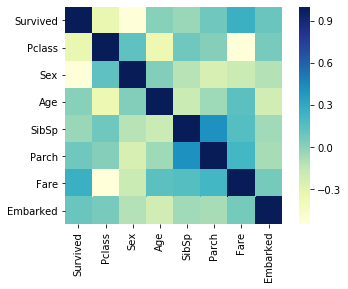

In [262]:
# Calculate the correlation and coefficent of the data
cor_cor = norm_train_set.corr()
ax = sns.heatmap(cor_cor, square=True, cmap="YlGnBu")
plt.show()

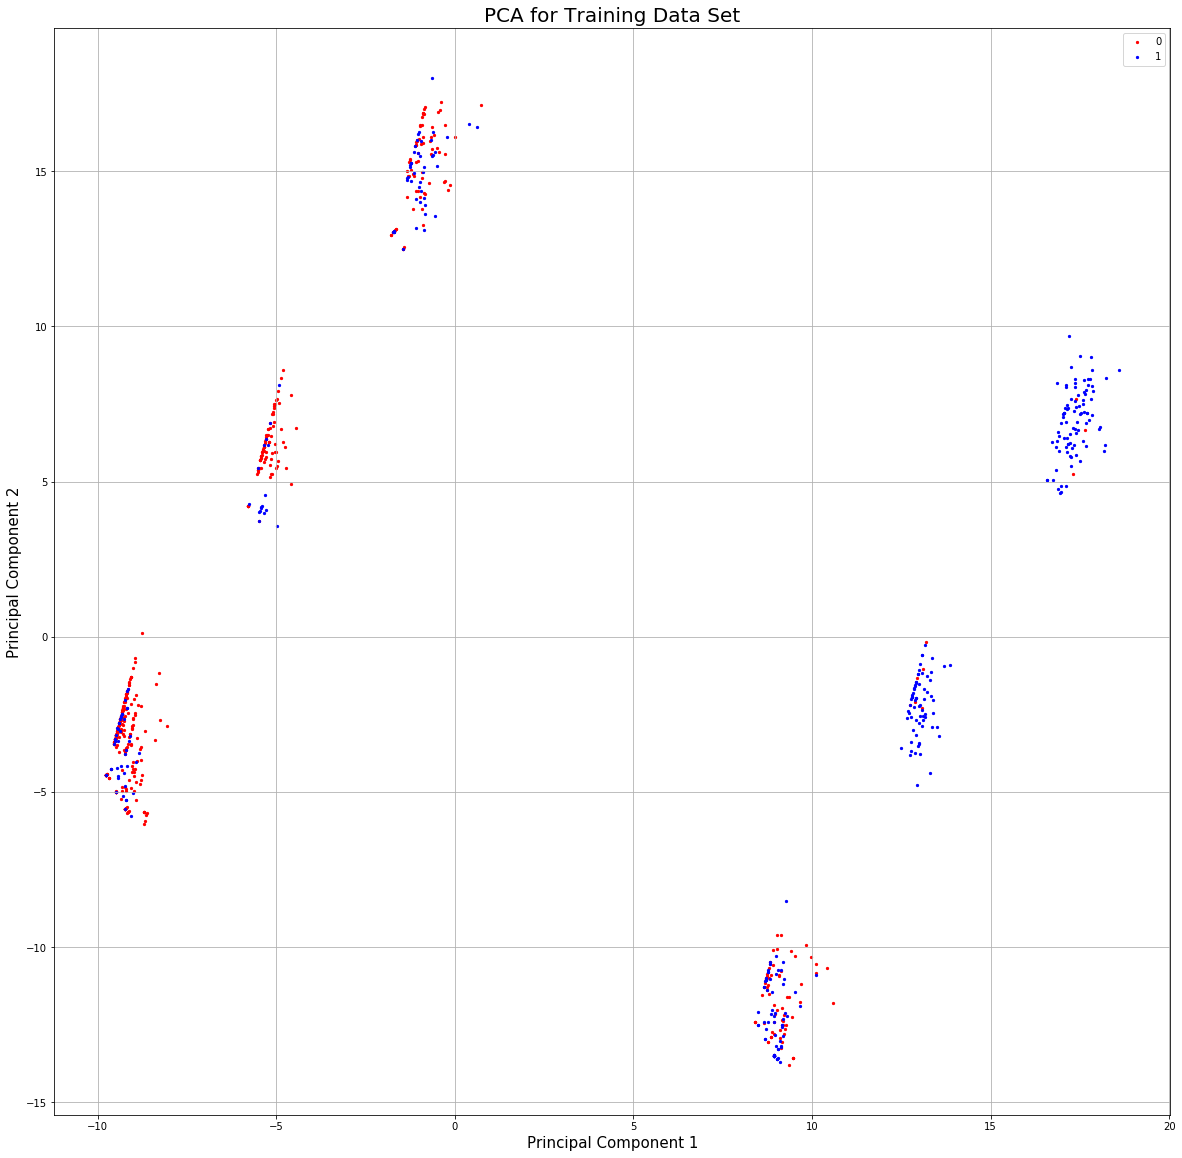

In [263]:
# PCA

# Define the dimention of the output data
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(rest_normed_train_set)
PC_df = pd.DataFrame(data = principalComponents, columns = ['pc_1', 'pc_2'])
PC_df.index += 1
PCA_df = pd.concat([PC_df, survived_coloum], axis = 1)

# Draw PCA data into scatter plot based on survival
fig = plt.figure(figsize = (20, 20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA for Training Data Set', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets, colors):
    index = PCA_df['Survived'] == target
    ax.scatter(PCA_df.loc[index, 'pc_1']
               , PCA_df.loc[index, 'pc_2']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

# PCA_df



In [264]:
# Save PCA data into a file
PCA_df.to_csv("PCA_Data.csv", index = False)

In [265]:
LSVC = LinearSVC()
gnb = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors = 5)
MNB = MultinomialNB()
BNB = BernoulliNB()
LR = LogisticRegression()
SDG = SGDClassifier()
SVC = SVC()
NSVC = NuSVC()

def output_result(model, name):
    train_set_array = rest_normed_train_set.values
    label_array = np.asarray(survived_coloum["Survived"])
    test_set_array = normed_test_set.values
    
    model.fit(train_set_array, label_array)
    prediction = model.predict(test_set_array)
    
    result = pd.DataFrame(prediction)
    result.index += 892
    result.index.names = ['PassengerId']
    result.columns = ['Survived']
    result.to_csv(f"results/{name}_titanic.csv", index = True)

output_result(LSVC, "LSVC")
output_result(gnb, "gnb")
output_result(KNN, "KNN")
output_result(MNB, "MNB")
output_result(BNB, "BNB")
output_result(LR, "LR")
output_result(SDG, "SDG")
output_result(SVC, "SVC")
output_result(NSVC, "NSVC")


/Users/hoanjinan_otoko/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/hoanjinan_otoko/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hoanjinan_otoko/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/hoanjinan_otoko/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unsc